In [1]:
# Main modules
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('publication23.mplstyle')

# Integration
from scipy.integrate import quad, quadrature

# Custom modules
import modules_py.functions as f

In [2]:
def get_data_from_file(filename):
    '''Data getter.'''
    data = np.genfromtxt(filename)
    if data.ndim == 1:
        return np.array([data[0]]), np.array([data[1:]])
    else:
        return data[:, 0], data[:, 1:]

# Sorting key
import re
def atoi(text):
    '''Turns text to numbers.'''
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''Keys for intuitive string sorting.'''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [12]:
def integrand(w, k, pf):
    return 2 / np.pi * w * f.d_pnn_corr_ff_pnd_corr_ff(k, w, pf, width=0).imag # <--

pf = 2.9
n_pf = 2 * pf ** 3 / (3 * np.pi ** 2 * 0.47)
pf_name = '%.3f/' % pf
graphs_dir = 'graph_data/'
function_name = 'unity_eq_pnn_corr_ff_pnd_corr_ff/' # <--
directory_name = graphs_dir + function_name + pf_name

graph_files = os.listdir(directory_name)
graph_files.sort(key=natural_keys)

In [15]:
k_sum_rule = np.array([])
sum_rule_total = np.array([])

sum_rule_contribution_integral = np.array([])
sum_rule_contribution_sum = np.array([])

w_break = 3 # Change if something bad happens

for graph_file in graph_files:
    K, W = get_data_from_file(directory_name + graph_file)
    k_sum_rule = np.append(k_sum_rule, K)
    
    for i, k in enumerate(K):
        tmp_integral = quad(integrand, 1e-9, w_break, args=(k, pf))[0]
        tmp_integral += quad(integrand, w_break, 10, args=(k, pf))[0]
        
        tmp_sum = 0
        for w in W[i, :]:
            if np.abs(f.d_pnn_corr_ff_pnd_corr_ff(k, w, pf, width=0).imag) == 0: # <--
                tmp_sum += 2.0 * w / (2.0 * w - f.pi_pnn_corr_ff_pnd_corr_ff_dw(k, w, pf)) # <--
        
        sum_rule_contribution_integral = np.append(sum_rule_contribution_integral, tmp_integral)
        sum_rule_contribution_sum = np.append(sum_rule_contribution_sum, tmp_sum)
        sum_rule_total = np.append(sum_rule_total, tmp_integral + tmp_sum)

/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


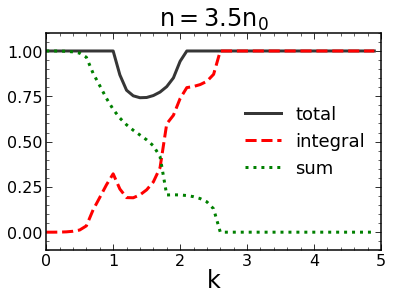

In [16]:
%matplotlib inline

plt.plot(k_sum_rule, sum_rule_total, color='#363636', label='total')
plt.plot(k_sum_rule, sum_rule_contribution_integral, color='red', ls='--', label='integral')
plt.plot(k_sum_rule, sum_rule_contribution_sum, color='green', ls=':', label='sum')

plt.title(r'$n = %.1f n_0$' % n_pf)
plt.xlabel(r'$k$')
plt.ylim(-0.1, 1.1)
plt.xlim(0, 5)
plt.legend(frameon=False)
plt.savefig('figures/unity/unity_pnn_corr_ff_pnd_corr_ff_%4.2f.pdf' % n_pf, format='PDF', dpi=300, bbox_inches='tight') # <--
plt.show()

## Each branch contribution to sum

In [7]:
k_sum_contribution_sound = np.array([])
k_sum_contribution_pion = np.array([])
k_sum_contribution_delta = np.array([])

sum_contribution_sound = np.array([])
sum_contribution_pion = np.array([])
sum_contribution_delta = np.array([])

for graph_file in graph_files:
    K, W = get_data_from_file(directory_name + graph_file)
    
    for i, k in enumerate(K):
        for w in W[i, :]:
            if np.abs(f.d_pnn_corr_ff_pnd_corr_ff(k, w, pf, width=0).imag) == 0: # <--
                contribution = 2.0 * w / (2.0 * w - f.pi_pnn_corr_ff_pnd_corr_ff_dw(k, w, pf)) # <--
                if w < 1:
                    sum_contribution_sound = np.append(sum_contribution_sound, contribution)
                    k_sum_contribution_sound = np.append(k_sum_contribution_sound, k)
                if w > 0.9 and w < 2:
                    sum_contribution_pion = np.append(sum_contribution_pion, contribution)
                    k_sum_contribution_pion = np.append(k_sum_contribution_pion, k)
                if w > 2:
                    sum_contribution_delta = np.append(sum_contribution_delta, contribution)
                    k_sum_contribution_delta = np.append(k_sum_contribution_delta, k)

k_sum_contribution_sound = np.append(k_sum_contribution_sound, 0)
sum_contribution_sound = np.append(sum_contribution_sound, 0)

/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


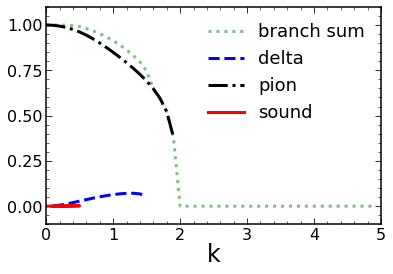

In [8]:
%matplotlib inline

plt.plot(k_sum_rule, sum_rule_contribution_sum, color='green', ls=':', label='branch sum', alpha=0.5)

plt.plot(k_sum_contribution_delta, sum_contribution_delta, color='blue', ls='--', label='delta')
plt.plot(k_sum_contribution_pion, sum_contribution_pion, color='black', ls='-.', label='pion')
plt.plot(k_sum_contribution_sound, sum_contribution_sound, color='red', ls='-', label='sound')

plt.xlabel(r'$k$')
plt.ylim(-0.1, 1.1)
plt.xlim(0, 5)

plt.legend(frameon=False)
plt.savefig('figures/unity/sum_unity_pnn_corr_ff_pnd_corr_ff_%4.2f.pdf' % n_pf, dpi=300, format='PDf', bbox_inches='tight')
plt.show()

/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dt

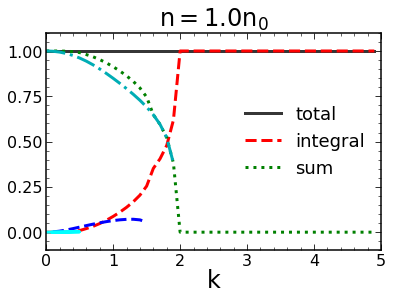

In [77]:
plt.plot(k_sum_rule, sum_rule_total, color='#363636', label='total')
plt.plot(k_sum_rule, sum_rule_contribution_integral, color='red', ls='--', label='integral')
plt.plot(k_sum_rule, sum_rule_contribution_sum, color='green', ls=':', label='sum')

plt.plot(k_sum_contribution_delta, sum_contribution_delta, color='blue', ls='--')
plt.plot(k_sum_contribution_pion, sum_contribution_pion, color='#00adb5', ls='-.')
plt.plot(k_sum_contribution_sound, sum_contribution_sound, color='cyan', ls='-')

plt.title(r'$n = %.1f n_0$' % n_pf)
plt.xlabel(r'$k$')
plt.ylim(-0.1, 1.1)
plt.xlim(0, 5)
plt.legend(frameon=False)
# plt.savefig('figures/unity/total_pnn_corr_ff_pnd_corr_ff_%4.2f.jpg' % n_pf, format='JPG', dpi=300, bbox_inches='tight') # <--
plt.show()